# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(url, sep='\t')

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = df

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [5]:
item_sum = chipo.groupby("item_name")["quantity"].sum().reset_index()
sorted = item_sum.sort_values("quantity", ascending=False)
top_5 = sorted.head(5)

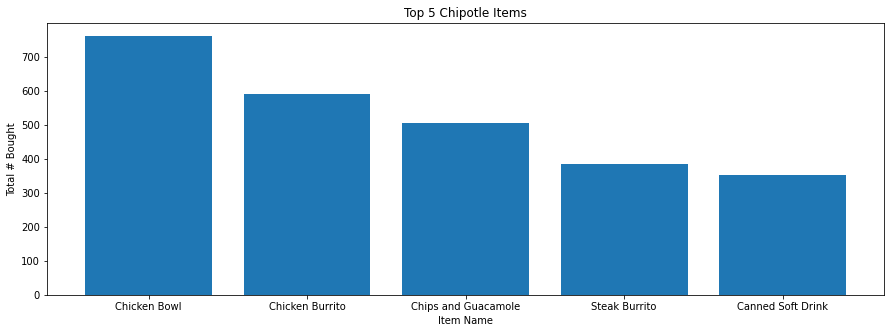

In [6]:
plt.figure(figsize=(15,5))
plt.bar(top_5["item_name"], top_5["quantity"])
plt.title("Top 5 Chipotle Items")
plt.xlabel("Item Name")
plt.ylabel("Total # Bought")
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [7]:
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x.strip('$')))
order_price_and_quantity = chipo.groupby("order_id")[["quantity", "item_price"]].sum()

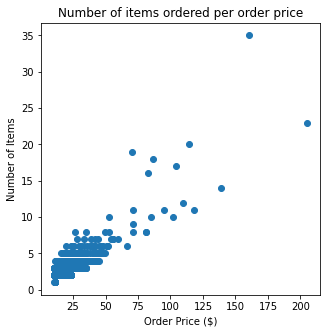

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(order_price_and_quantity["item_price"], order_price_and_quantity["quantity"])
plt.title("Number of items ordered per order price")
plt.xlabel("Order Price ($)")
plt.ylabel("Number of Items")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.